#Dataset : IBM HR Analytics Employees
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Attrition = (Resign / Karyawan yang tidak ada dalam perusahaan)

- Masalah:
Menurunnya peforma perusahaan karena adanya kekosongan waktu jabatan yang disebabkan oleh ketidakpastian karyawan apakah resign atau tidak (Attrition).

- Tujuan:
Mengetahui karyawan attrition.

Metode:
Classifaction : SVM, Logistic Regression dan KNN

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read dataset
df = pd.read_csv('IBM HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Cek apa ada data yang kosong
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Tunjukkan total data baris, kolum
df.shape

(1470, 35)

In [5]:
#Tujukkan features / attribute / columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Tunjukkan tiap tipe attribute dari dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#Mencoba mencari dan melihat attribute dalam tipe kategori
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Jumlah attribute tipe kategori:",len(categorical_features))
categorical_features

Jumlah attribute tipe kategori: 9


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [8]:
#Mencoba mencari dan melihat attribute dalam tipe angka/numerik
numerical_features = [feature for feature in df.columns if feature not in categorical_features]
print("Jumlah attribute tipe angka:",len(numerical_features))
print(numerical_features)

Jumlah attribute tipe angka: 26
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [9]:
#Melihat jumlah pembagian data pada tiap kategori
for i in categorical_features:
    print(df[[i]].value_counts(), "\n")

Attrition
No           1233
Yes           237
dtype: int64 

BusinessTravel   
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
dtype: int64 

Department            
Research & Development    961
Sales                     446
Human Resources            63
dtype: int64 

EducationField  
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
dtype: int64 

Gender
Male      882
Female    588
dtype: int64 

JobRole                  
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
dtype: int64 

MaritalStatus
Married          673
Single           470
Divorced         327
dtype: int64 

Over18
Y         1470
dtype: int64 

OverTim

In [10]:
#Mencari nomor unik pada tiap numberik attribute
for i in numerical_features:
    print(i, df[i].nunique())

Age 43
DailyRate 886
DistanceFromHome 29
Education 5
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobSatisfaction 4
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


# Attribute yang di drop
['Over18',
"BusinessTravel",
'DailyRate',
'EmployeeCount',
'EmployeeNumber',
'HourlyRate',
'MonthlyRate',
'StandardHours',
'StockOptionLevel']

In [11]:
df_filter = df.drop(['Over18',"BusinessTravel",'DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','StandardHours','StockOptionLevel'], axis = 1)
df_filter

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Life Sciences,2,Female,3,2,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Research & Development,8,1,Life Sciences,3,Male,2,2,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Research & Development,2,2,Other,4,Male,2,1,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Research & Development,3,4,Life Sciences,4,Female,3,1,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Research & Development,2,1,Medical,1,Male,3,1,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,Male,4,2,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Research & Development,6,1,Medical,4,Male,2,3,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Research & Development,4,3,Life Sciences,2,Male,4,2,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Sales,2,3,Medical,4,Male,2,2,...,14,3,4,17,3,2,9,6,0,8


In [12]:
#Mencoba mencari dan melihat attribute dalam tipe kategori
categorical_features = [feature for feature in df_filter.columns if df_filter[feature].dtype == 'O']
print("Jumlah attribute tipe kategori:",len(categorical_features))
categorical_features

Jumlah attribute tipe kategori: 7


['Attrition',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [13]:
for i in categorical_features:
    print(df_filter[[i]].value_counts(), "\n")

Attrition
No           1233
Yes           237
dtype: int64 

Department            
Research & Development    961
Sales                     446
Human Resources            63
dtype: int64 

EducationField  
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
dtype: int64 

Gender
Male      882
Female    588
dtype: int64 

JobRole                  
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
dtype: int64 

MaritalStatus
Married          673
Single           470
Divorced         327
dtype: int64 

OverTime
No          1054
Yes          416
dtype: int64 



In [14]:
#Mencoba mencari dan melihat attribute dalam tipe angka/numerik
numerical_features = [feature for feature in df_filter.columns if feature not in categorical_features]
print("Jumlah attribute tipe angka:",len(numerical_features))
print(numerical_features)

Jumlah attribute tipe angka: 19
['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [15]:
#Mencari nomor unik pada tiap numberik attribute
for i in numerical_features:
    print(i, df_filter[i].nunique())

Age 43
DistanceFromHome 29
Education 5
EnvironmentSatisfaction 4
JobInvolvement 4
JobLevel 5
JobSatisfaction 4
MonthlyIncome 1349
NumCompaniesWorked 10
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [16]:
# Membuat list untuk attribute numerik, keunikan tidak melebihi 11 macam
discrete_numerical_features = []
for i in numerical_features:
    if (df_filter[i].nunique()<11):
        discrete_numerical_features.append(i)

In [18]:
#Melihat summary statistik data numerik
df_filter.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
#Melihat summary data kategorikal
df_filter.describe(include = "O")

,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470
unique,2,3,6,2,9,3,2
top,No,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,961,606,882,326,673,1054


#Visualisasi

In [20]:
#Mapping ubah yes jadi angka 1 dan no jadi angka 0 pada attribute attrition
#Attrition_mapping = {"Yes": 1, "No": 0}
#df_filter['Attrition'] = df_filter['Attrition'].map(Attrition_mapping)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

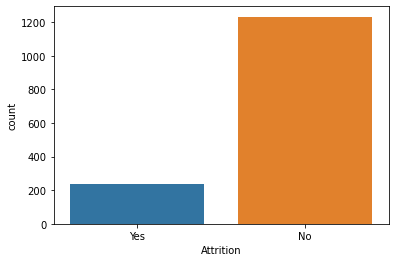

In [21]:
#Melihat perbandingan pada attribute attrition
Attrition_mapping = {"Yes": 1, "No": 0}
df_filter['Attrition'].map(Attrition_mapping)
sns.countplot(df_filter['Attrition'])

In [22]:
#Menghitung karyawan yang attrition
attrition = df_filter[(df_filter['Attrition'] == "Yes")]
no_attrition = df_filter[(df_filter['Attrition'] == "No")]
print('Percentage of Attrition: {}'.format(len(attrition)/len(df_filter)))
print('Percentage of No Attrition: {}'.format(len(no_attrition)/len(df_filter)))

Percentage of Attrition: 0.16122448979591836
Percentage of No Attrition: 0.8387755102040816


In [23]:
df_filter.groupby(["Gender","Attrition"]).size().unstack()

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


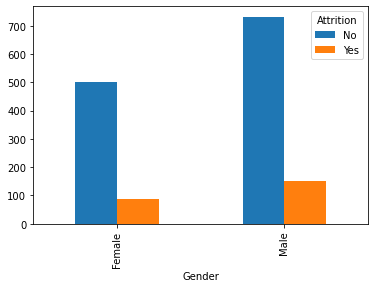

In [24]:
df_filter.groupby(["Gender","Attrition"]).size().unstack().plot(kind="bar")
plt.show()

In [25]:
df_filter.groupby(["Department","Attrition"]).size().unstack()

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


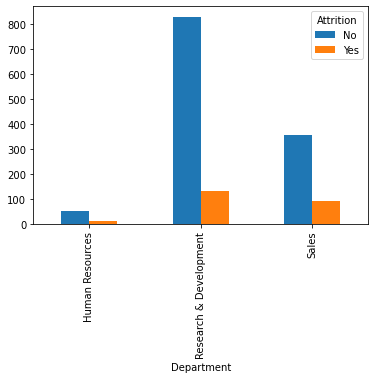

In [26]:
df_filter.groupby(["Department","Attrition"]).size().unstack().plot(kind="bar")
plt.show()

In [80]:
df_filter.groupby(["EducationField","Attrition"]).size().unstack()

Attrition,0,1
EducationField,,
0,20,7
1,517,89
2,124,35
3,401,63
4,71,11
5,100,32


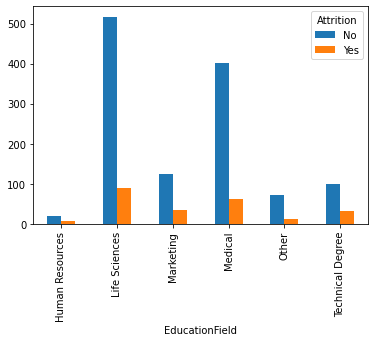

In [28]:
df_filter.groupby(["EducationField","Attrition"]).size().unstack().plot(kind="bar")
plt.show()

In [81]:
df_filter.groupby(["MaritalStatus","Attrition"]).size().unstack()

Attrition,0,1
MaritalStatus,,
0,294,33
1,589,84
2,350,120


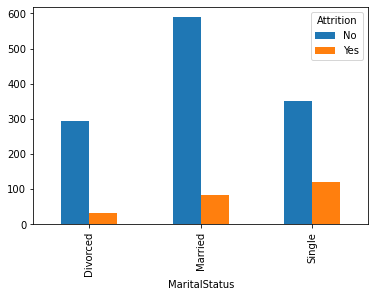

In [30]:
df_filter.groupby(["MaritalStatus","Attrition"]).size().unstack().plot(kind="bar")
plt.show()

In [31]:
df_filter.groupby(["OverTime","Attrition"]).size().unstack()

Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


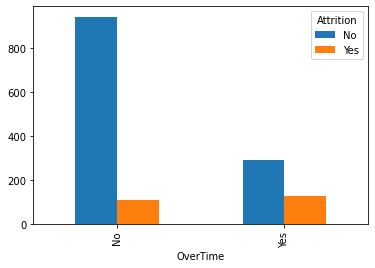

In [32]:
df_filter.groupby(["OverTime","Attrition"]).size().unstack().plot(kind="bar")
plt.show()

<AxesSubplot:xlabel='Age'>

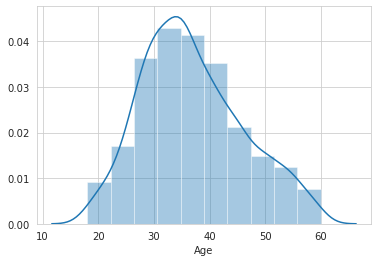

In [33]:
sns.set_style('whitegrid')
sns.distplot(df_filter['Age'], bins = 10)

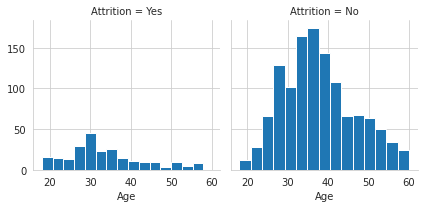

In [34]:
g = sns.FacetGrid(df_filter, col='Attrition')
g.map(plt.hist, 'Age', bins=15)

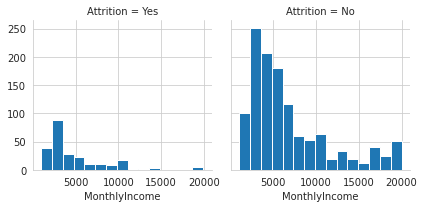

In [35]:
g = sns.FacetGrid(df_filter, col='Attrition')
g.map(plt.hist, 'MonthlyIncome', bins=15)

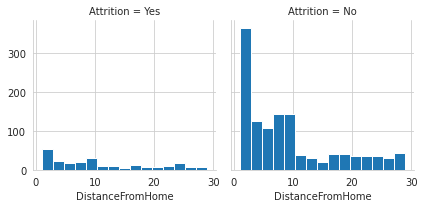

In [36]:
g = sns.FacetGrid(df_filter, col='Attrition')
g.map(plt.hist, 'DistanceFromHome', bins=15)

In [37]:
df_filter.groupby(["PerformanceRating","Attrition"]).size().unstack()

Attrition,No,Yes
PerformanceRating,,
3,1044,200
4,189,37


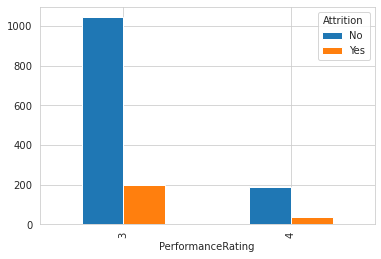

In [38]:
df_filter.groupby(["PerformanceRating","Attrition"]).size().unstack().plot(kind="bar")
plt.show()

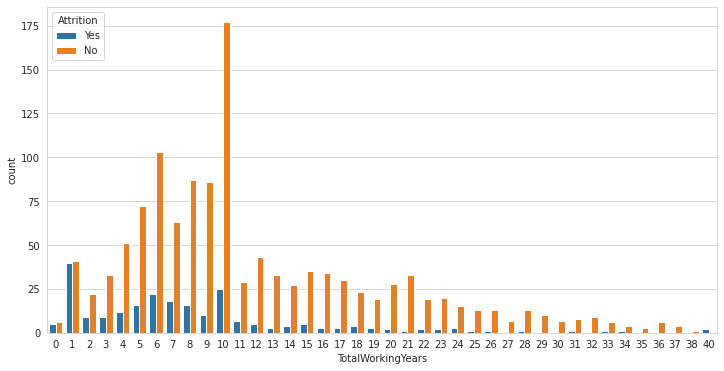

In [39]:
plt.figure(figsize = (12,6))
sns.countplot(df['TotalWorkingYears'], hue = df_filter['Attrition'])
plt.show()

#Preprocessing Data

Text(0.5, 1.0, 'Heatmap for Correlation between Features')

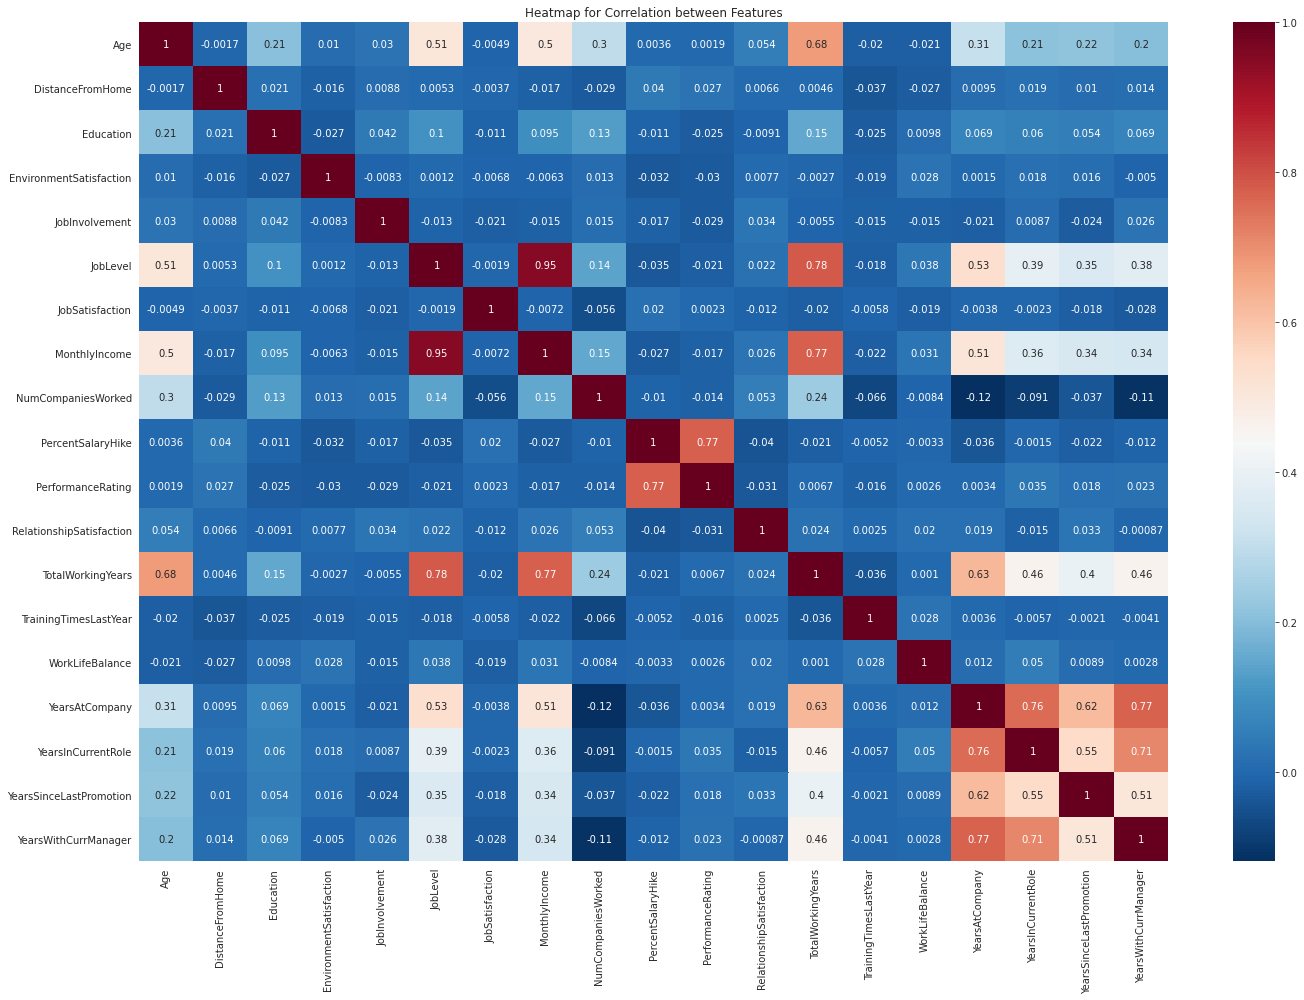

In [40]:
#Menunjukkan data kolerasi dalam heatmap
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
k_corr_matrix1 =df_filter.corr()
plt.figure(figsize=(20,14))
sns.heatmap(k_corr_matrix1, annot=True, cmap=plt.cm.RdBu_r)
plt.title('Heatmap for Correlation between Features')

In [41]:
# Membuat fungsi untuk mencari attribute dengan tingkat kolerasi tertentu

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
tingkat_kolerasi = 0.7
corr_features = correlation(df_filter, tingkat_kolerasi)
print("Terdapat", len(set(corr_features)), "Macam Kolerasi dengan tingkat kolerasi", tingkat_kolerasi)

Terdapat 5 Macam Kolerasi dengan tingkat kolerasi 0.7


In [43]:
corr_features

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [44]:
categorical_features = [feature for feature in df_filter.columns if df_filter[feature].dtype == 'O']
categorical_features

['Attrition',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [45]:
#Label-Encoding ordinal categorical features 
from sklearn.preprocessing import LabelEncoder
for c in categorical_features:
    lbl = LabelEncoder() 
    lbl.fit(list(df_filter[c].values)) 
    df_filter[c] = lbl.transform(list(df_filter[c].values))

In [46]:
df_filter.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,11,3,1,8,0,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,23,4,4,10,3,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,15,3,2,7,3,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,11,3,3,8,3,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,12,3,4,6,3,3,2,2,2,2


In [47]:
# Attribute yang dipakai
df_filter.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [48]:
df_filter.shape

(1470, 26)

#Split Train & Test Data

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = np.asarray(df_filter.drop(['Attrition'], axis = 1))
X = preprocessing.StandardScaler().fit(X).transform(X)
y = np.asarray(df_filter['Attrition'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
print('Attribute faktor dalam bentuk array : \n',X[0:5])
print('\nAttribute target dalam bentuk array : \n',y[0:5])
print ('\nTrain set:', X_train.shape,  y_train.shape)
print ('\nTest set:', X_test.shape,  y_test.shape)

Attribute faktor dalam bentuk array : 
 [[ 0.4463504   1.40151234 -1.01090934 -0.89168825 -0.93741369 -0.66053067
  -1.22474487  0.37967213 -0.05778755  1.03271569  1.15325359  1.23682046
  -0.10834951  2.12513592  1.59174553 -1.1505541  -0.42623002 -1.58417824
  -0.42164246 -2.17198183 -2.49382042 -0.16461311 -0.0632959  -0.67914568
   0.24583399]
 [ 1.32236521 -0.49381714 -0.14714972 -1.86842575 -0.93741369  0.25462493
   0.81649658 -1.02616674 -0.05778755  0.62637413 -0.66085318 -0.13328208
  -0.29171859 -0.67804939 -0.62824112  2.12930601  2.34615106  1.19143799
  -0.1645114   0.15570708  0.33809616  0.48850773  0.76499762 -0.36871529
   0.80654148]
 [ 0.008343   -0.49381714 -0.88751511 -0.89168825  1.31667267  1.16978053
   0.81649658 -1.02616674 -0.96148639 -0.99899211  0.2462002   1.23682046
  -0.93765369  1.32422583  1.59174553 -0.0572674  -0.42623002 -0.65897283
  -0.55020799  0.15570708  0.33809616 -1.14429437 -1.16768726 -0.67914568
  -1.15593471]
 [-0.42966441 -0.49381714 -

#Model SVM

In [51]:
from sklearn import svm
model_svm = svm.SVC(kernel='rbf')
model_svm.fit(X_train, y_train) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
yhat = model_svm.predict(X_test)
yhat [0:5]

array([0, 0, 1, 0, 0])

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

print("Train set Accuracy: ", jaccard_similarity_score(y_train, model_svm.predict(X_train)))
print("Test set Accuracy: ", jaccard_similarity_score(y_test, yhat))

Train set Accuracy:  0.9005102040816326
Test set Accuracy:  0.8877551020408163


In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

print("Train set Accuracy: ", f1_score(y_train, model_svm.predict(X_train), average='weighted'))
print("Test set Accuracy: ", f1_score(y_test, yhat, average='weighted'))

Train set Accuracy:  0.8841383097019984
Test set Accuracy:  0.8622666432020326


Confusion matrix, without normalization
[[249   2]
 [ 31  12]]


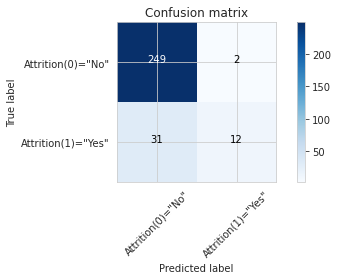

In [57]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition(0)="No"','Attrition(1)="Yes"'],normalize= False,  title='Confusion matrix')

In [58]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       251
           1       0.86      0.28      0.42        43

   micro avg       0.89      0.89      0.89       294
   macro avg       0.87      0.64      0.68       294
weighted avg       0.88      0.89      0.86       294



#Model Logistic Regression

In [59]:
X = np.asarray(df_filter.drop(['Attrition'], axis = 1))
y = np.asarray(df_filter['Attrition'])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Attribute faktor dalam bentuk array : \n',X[0:5])
print('\nAttribute target dalam bentuk array : \n',y[0:5])
print ('\nTrain set:', X_train.shape,  y_train.shape)
print ('\nTest set:', X_test.shape,  y_test.shape)

Attribute faktor dalam bentuk array : 
 [[ 0.45  1.4  -1.01 -0.89 -0.94 -0.66 -1.22  0.38 -0.06  1.03  1.15  1.24
  -0.11  2.13  1.59 -1.15 -0.43 -1.58 -0.42 -2.17 -2.49 -0.16 -0.06 -0.68
   0.25]
 [ 1.32 -0.49 -0.15 -1.87 -0.94  0.25  0.82 -1.03 -0.06  0.63 -0.66 -0.13
  -0.29 -0.68 -0.63  2.13  2.35  1.19 -0.16  0.16  0.34  0.49  0.76 -0.37
   0.81]
 [ 0.01 -0.49 -0.89 -0.89  1.32  1.17  0.82 -1.03 -0.96 -1.    0.25  1.24
  -0.94  1.32  1.59 -0.06 -0.43 -0.66 -0.55  0.16  0.34 -1.14 -1.17 -0.68
  -1.16]
 [-0.43 -0.49 -0.76  1.06 -0.94  1.17 -1.22  0.38 -0.96  0.63  0.25 -0.13
  -0.76 -0.68  1.59 -1.15 -0.43  0.27 -0.42  0.16  0.34  0.16  0.76  0.25
  -1.16]
 [-1.09 -0.49 -0.89 -1.87  0.57 -1.58  0.82  0.38 -0.96 -1.   -0.66 -0.13
  -0.64  2.53 -0.63 -0.88 -0.43  1.19 -0.68  0.16  0.34 -0.82 -0.62 -0.06
  -0.6 ]]

Attribute target dalam bentuk array : 
 [1 0 1 0 0]

Train set: (1176, 25) (1176,)

Test set: (294, 25) (294,)


In [62]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:30]

array([[0.83, 0.17],
       [0.75, 0.25],
       [0.47, 0.53],
       [0.72, 0.28],
       [0.61, 0.39],
       [0.49, 0.51],
       [0.85, 0.15],
       [0.88, 0.12],
       [0.88, 0.12],
       [0.73, 0.27],
       [0.84, 0.16],
       [0.8 , 0.2 ],
       [0.92, 0.08],
       [0.52, 0.48],
       [0.9 , 0.1 ],
       [0.91, 0.09],
       [0.57, 0.43],
       [0.74, 0.26],
       [0.86, 0.14],
       [0.81, 0.19],
       [0.83, 0.17],
       [0.78, 0.22],
       [0.65, 0.35],
       [0.52, 0.48],
       [0.83, 0.17],
       [0.82, 0.18],
       [0.66, 0.34],
       [0.68, 0.32],
       [0.7 , 0.3 ],
       [0.88, 0.12]])

In [65]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

print("Train set Accuracy: ", jaccard_similarity_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", jaccard_similarity_score(y_test, yhat))

Train set Accuracy:  0.8622448979591837
Test set Accuracy:  0.8945578231292517


In [66]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

print("Train set Accuracy: ", f1_score(y_train, LR.predict(X_train), average='weighted'))
print("Test set Accuracy: ", f1_score(y_test, yhat, average='weighted') )

Train set Accuracy:  0.8287464222606266
Test set Accuracy:  0.8706141193716064


Confusion matrix, without normalization
[[250   1]
 [ 30  13]]


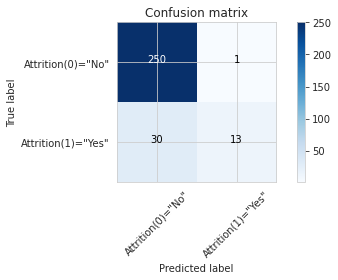

In [68]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition(0)="No"','Attrition(1)="Yes"'],normalize= False,  title='Confusion matrix')

In [69]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       251
           1       0.93      0.30      0.46        43

   micro avg       0.89      0.89      0.89       294
   macro avg       0.91      0.65      0.70       294
weighted avg       0.90      0.89      0.87       294



#Model KNN (K_Nearest_Neighbors)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
X = np.asarray(df_filter.drop(['Attrition'], axis = 1))
y = np.asarray(df_filter['Attrition'])

In [71]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.45,  1.4 , -1.01, -0.89, -0.94, -0.66, -1.22,  0.38, -0.06,
         1.03,  1.15,  1.24, -0.11,  2.13,  1.59, -1.15, -0.43, -1.58,
        -0.42, -2.17, -2.49, -0.16, -0.06, -0.68,  0.25],
       [ 1.32, -0.49, -0.15, -1.87, -0.94,  0.25,  0.82, -1.03, -0.06,
         0.63, -0.66, -0.13, -0.29, -0.68, -0.63,  2.13,  2.35,  1.19,
        -0.16,  0.16,  0.34,  0.49,  0.76, -0.37,  0.81],
       [ 0.01, -0.49, -0.89, -0.89,  1.32,  1.17,  0.82, -1.03, -0.96,
        -1.  ,  0.25,  1.24, -0.94,  1.32,  1.59, -0.06, -0.43, -0.66,
        -0.55,  0.16,  0.34, -1.14, -1.17, -0.68, -1.16],
       [-0.43, -0.49, -0.76,  1.06, -0.94,  1.17, -1.22,  0.38, -0.96,
         0.63,  0.25, -0.13, -0.76, -0.68,  1.59, -1.15, -0.43,  0.27,
        -0.42,  0.16,  0.34,  0.16,  0.76,  0.25, -1.16],
       [-1.09, -0.49, -0.89, -1.87,  0.57, -1.58,  0.82,  0.38, -0.96,
        -1.  , -0.66, -0.13, -0.64,  2.53, -0.63, -0.88, -0.43,  1.19,
        -0.68,  0.16,  0.34, -0.82, -0.62, -0.06, -0.6 ]])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Attribute faktor dalam bentuk array : \n',X[0:5])
print('\nAttribute target dalam bentuk array : \n',y[0:5])
print ('\nTrain set:', X_train.shape,  y_train.shape)
print ('\nTest set:', X_test.shape,  y_test.shape)

Attribute faktor dalam bentuk array : 
 [[ 0.45  1.4  -1.01 -0.89 -0.94 -0.66 -1.22  0.38 -0.06  1.03  1.15  1.24
  -0.11  2.13  1.59 -1.15 -0.43 -1.58 -0.42 -2.17 -2.49 -0.16 -0.06 -0.68
   0.25]
 [ 1.32 -0.49 -0.15 -1.87 -0.94  0.25  0.82 -1.03 -0.06  0.63 -0.66 -0.13
  -0.29 -0.68 -0.63  2.13  2.35  1.19 -0.16  0.16  0.34  0.49  0.76 -0.37
   0.81]
 [ 0.01 -0.49 -0.89 -0.89  1.32  1.17  0.82 -1.03 -0.96 -1.    0.25  1.24
  -0.94  1.32  1.59 -0.06 -0.43 -0.66 -0.55  0.16  0.34 -1.14 -1.17 -0.68
  -1.16]
 [-0.43 -0.49 -0.76  1.06 -0.94  1.17 -1.22  0.38 -0.96  0.63  0.25 -0.13
  -0.76 -0.68  1.59 -1.15 -0.43  0.27 -0.42  0.16  0.34  0.16  0.76  0.25
  -1.16]
 [-1.09 -0.49 -0.89 -1.87  0.57 -1.58  0.82  0.38 -0.96 -1.   -0.66 -0.13
  -0.64  2.53 -0.63 -0.88 -0.43  1.19 -0.68  0.16  0.34 -0.82 -0.62 -0.06
  -0.6 ]]

Attribute target dalam bentuk array : 
 [1 0 1 0 0]

Train set: (1176, 25) (1176,)

Test set: (294, 25) (294,)


In [73]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [74]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0])

In [75]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8605442176870748
Test set Accuracy:  0.8571428571428571


In [76]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.82, 0.84, 0.84, 0.86, 0.86, 0.86, 0.88, 0.87, 0.88, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.86, 0.86, 0.85, 0.86, 0.85, 0.86, 0.85,
       0.86, 0.85, 0.85, 0.85, 0.86, 0.85, 0.86, 0.85, 0.85, 0.85, 0.85,
       0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85,
       0.85, 0.85, 0.85, 0.85, 0.85])

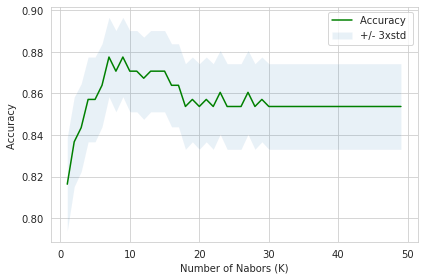

In [77]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [78]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8775510204081632 with k= 7


In [79]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8613945578231292
Test set Accuracy:  0.8775510204081632
